In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [120]:
# Grab the datasets and remove the date features
raw_df = pd.read_csv("./Datasets/edited_train.csv")
df = raw_df.copy()
df.drop(["Unnamed: 0", "first_day_of_month"], axis=1, inplace=True)
df.columns

Index(['microbusiness_density', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019',
       'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

In [121]:
# Randomize Data
df = df.sample(frac=1)
df.reset_index(drop=True, inplace=True)
n = len(df.index)
print(n)
df.head()

122148


,microbusiness_density,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,0.428508,55.1,64.6,69.0,72.2,74.6,11.1,10.7,11.1,11.4,...,0.7,1.1,0.2,0.3,0.2,41885,44486.0,45714,43410.0,46451.0
1,3.731257,74.8,77.9,80.2,82.6,83.7,13.3,13.8,14.0,14.6,...,1.5,1.5,1.4,1.4,1.3,48730,51261.0,53969,57109.0,61276.0
2,0.933890,55.8,58.3,61.7,65.6,70.5,6.5,6.6,7.8,12.4,...,1.2,1.6,1.3,1.0,0.7,44031,45338.0,48801,50553.0,52450.0
3,7.018933,78.3,81.2,82.5,84.4,86.4,20.4,22.7,24.6,23.8,...,1.2,1.5,1.2,0.6,0.8,59889,58099.0,59969,60975.0,65215.0
4,3.673472,69.4,72.2,74.6,78.1,79.9,15.2,15.1,15.4,16.2,...,1.7,1.6,1.4,1.7,1.7,45802,46166.0,47583,49625.0,51169.0


In [125]:
# 80% of data is training, %10 of data is validation, %10 of data is test

train_features = df.iloc[:int(0.8*n)]
train_labels = train_features["microbusiness_density"].copy()
train_features = train_features.drop("microbusiness_density", axis=1)

val_features = df.iloc[int(0.8*n):int(0.9*n)]
val_labels = val_features["microbusiness_density"].copy()
val_features = val_features.drop("microbusiness_density", axis=1)

test_features = df[int(0.9*n):]
test_labels = test_features["microbusiness_density"].copy()
test_features = test_features.drop("microbusiness_density", axis=1)


len(train_features.index), len(val_features.index), len(test_features.index)

(97718, 12215, 12215)

In [139]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [244]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(25, 1)),
    tf.keras.layers.Dense(35, activation="relu"),
    tf.keras.layers.Dense(35, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 25)                0         
                                                                 
 dense_54 (Dense)            (None, 35)                910       
                                                                 
 dense_55 (Dense)            (None, 35)                1260      
                                                                 
 dropout_15 (Dropout)        (None, 35)                0         
                                                                 
 dense_56 (Dense)            (None, 1)                 36        
                                                                 
Total params: 2,206
Trainable params: 2,206
Non-trainable params: 0
_________________________________________________________________


In [245]:
cp = ModelCheckpoint("feature_model", save_best_only=True)
model.compile(loss=MeanSquaredError(),
              optimizer=Adam(learning_rate=0.0001),
              metrics=[RootMeanSquaredError()])

In [246]:
model.fit(train_features, train_labels, 
          validation_data=(val_features, val_labels),
          epochs=10,
          callbacks=[cp])

Epoch 1/10
3054/3054 [==============================] - 8s 2ms/step - loss: 7692260.5000 - root_mean_squared_error: 2773.4924 - val_loss: 15172.6104 - val_root_mean_squared_error: 123.1771
Epoch 2/10
3054/3054 [==============================] - 7s 2ms/step - loss: 17474.0098 - root_mean_squared_error: 132.1893 - val_loss: 1055.2007 - val_root_mean_squared_error: 32.4839
Epoch 3/10
3054/3054 [==============================] - 8s 2ms/step - loss: 1170.6163 - root_mean_squared_error: 34.2143 - val_loss: 167.1652 - val_root_mean_squared_error: 12.9292
Epoch 4/10
3054/3054 [==============================] - 7s 2ms/step - loss: 278.0629 - root_mean_squared_error: 16.6752 - val_loss: 73.7436 - val_root_mean_squared_error: 8.5874
Epoch 5/10
3054/3054 [==============================] - 7s 2ms/step - loss: 79.7050 - root_mean_squared_error: 8.9278 - val_loss: 30.1785 - val_root_mean_squared_error: 5.4935
Epoch 6/10
3054/3054 [==============================] - 7s 2ms/step - loss: 29.1474 - root_m

In [247]:
from tensorflow.keras.models import load_model
model = load_model("feature_model")

In [248]:
train_predictions = model.predict(train_features).flatten()
train_results = pd.DataFrame(data={"Train Predictions":train_predictions, "Actuals":train_labels})
train_results.head()

,Train Predictions,Actuals
0,2.796039,0.428508
1,4.061503,3.731257
2,3.721115,0.933890
3,4.059243,7.018933
4,3.194962,3.673472


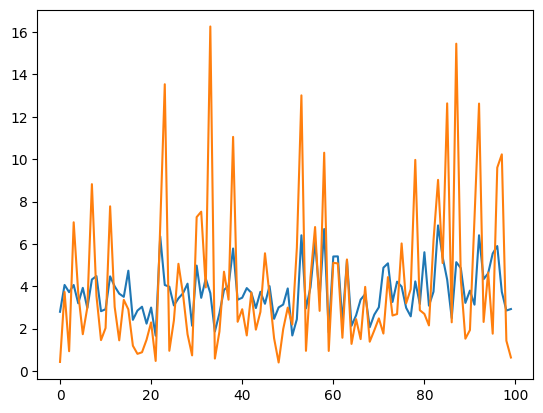

In [249]:
import matplotlib.pyplot as plt
plt.plot(train_results["Train Predictions"][:100])
plt.plot(train_results["Actuals"][:100])
plt.show()

In [250]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(train_results["Train Predictions"], train_results["Actuals"])
mse = mean_squared_error(train_results["Train Predictions"], train_results["Actuals"])
rmse = np.sqrt(mse)

print("Test")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 1.9964976019068494
MSE: 20.671757485458258
RMSE: 4.546620446601878


In [251]:
test_predictions = model.predict(test_features).flatten()
test_results = pd.DataFrame(data={"Test Predictions":test_predictions, "Actuals":test_labels})
test_results.head()

,Test Predictions,Actuals
109933,4.002872,3.406424
109934,4.988425,1.443937
109935,5.082893,4.450590
109936,3.630722,2.154383
109937,2.977170,1.955598


C:\Users\JRome\AppData\Local\Temp\ipykernel_11520\3344099483.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(test_results["Test Predictions"][:100])
C:\Users\JRome\AppData\Local\Temp\ipykernel_11520\3344099483.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(test_results["Actuals"][:100])


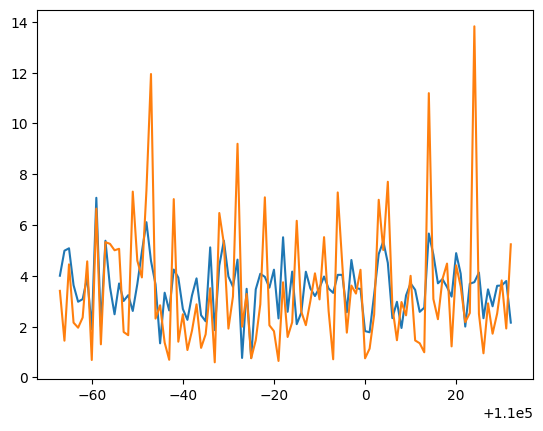

In [252]:
import matplotlib.pyplot as plt
plt.plot(test_results["Test Predictions"][:100])
plt.plot(test_results["Actuals"][:100])
plt.show()

In [253]:
mae = mean_absolute_error(test_results["Test Predictions"], test_results["Actuals"])
mse = mean_squared_error(test_results["Test Predictions"], test_results["Actuals"])
rmse = np.sqrt(mse)
print("Test:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 2.0091332059734315
MSE: 26.527700117543684
RMSE: 5.150504841036817
